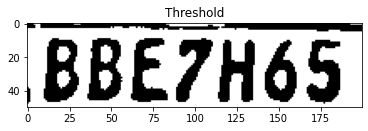

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


error: Unknown C++ exception from OpenCV code

In [5]:
import os
import cv2
import string
import easyocr
import argparse
import numpy as np
from PIL import Image
from easyocr import Reader
import matplotlib.pyplot as plt


folder = r'Ajuste de Perspectiva\Artigo 4\cropsPerspectiveAdjustmentForRecognition'
pathToSave = 'resultCascade'

totalPlaca = 0
acertoPlaca = 0
totalCaractere = 0
acertoCaractere = 0
maisQue7Caracteres = 0
totalMaisQue7Caracteres = 0

for filename in os.listdir(folder):
    
    caracteresPlaca = 0
    caracteresCorretosPlaca = 0
    text = None
    
#     path = folder+'\\'+filename
    img = cv2.imread(os.path.join(folder,filename))
    
    h, w, c = img.shape
    img = img[h - 55:h - 5, w - 220:w-20]

    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     plt.imshow(img, cmap='gray'), plt.title('Imagem Cinza')
#     plt.show()
    
    blurred = cv2.GaussianBlur(imgGray, (3,3), cv2.BORDER_DEFAULT)
#     plt.imshow(blurred, cmap='gray'), plt.title('Gaussiana')
#     plt.show()
    
    thresh = cv2.adaptiveThreshold(blurred, 70, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 35, 11)
    plt.imshow(thresh, cmap='gray'), plt.title('Threshold')
    plt.show()

## ----------------------------------------------------------------------------    
#     edged = cv2.Canny(thresh.copy(), 0, 0) 
#     plt.imshow(edged,cmap='gray'), plt.title('Canny')
#     plt.show()
    
#     resized = cv2.resize(edged, (500,100), interpolation = cv2.INTER_LANCZOS4)
#     plt.imshow(resized,cmap='gray'), plt.title('Resized')
#     plt.show()
    
#     contours, hierarchy = cv2.findContours(edged.copy(), 0, cv2.CHAIN_APPROX_SIMPLE)
#     sorted_ctrs = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])    
    
#     newImg = img.copy()
#     cv2.drawContours(newImg, contours, -1, (255,0,0), 2)
#     plt.imshow(newImg), plt.title('Contours')
#     plt.show()
      
#     digitos = []
#     area = None
#     for i, contorno in enumerate(sorted_ctrs):
#         (x, y, w, h) = cv2.boundingRect(contorno)
#         area = int(w) * int(h)
#         print(area)

#     #     if (area < 1500 and area > 1000):
#         if (area < 900 and area > 700):
#             digitos.append(thresh[y:y+h, x:x+w])
#             plt.figure(figsize=(5,5))
#             plt.imshow(thresh[y:y+h, x:x+w],cmap='gray'), plt.xticks([]), plt.yticks([])    
#         area = 0
## ----------------------------------------------------------------------------
    reader = easyocr.Reader(['en'], gpu='false')
    ALLOWED_LIST = string.ascii_uppercase+string.digits
    text = reader.readtext(thresh, paragraph="False",  detail = 0, allowlist = ALLOWED_LIST)
    
    if(text != None):
        totalPlaca = totalPlaca + 1
            
    print('Text:', text)
    print('Filename: ', filename)
#     os.remove(filename)
    list_of_letters = list(text[0])
    print("Recognition: ", list_of_letters)
    
    heuristc = ''
    for i, l in enumerate(list_of_letters):
        
        caracteresPlaca = caracteresPlaca + 1
        maisQue7Caracteres = maisQue7Caracteres + 1
        
        if(i == 0 or i == 1 or i == 2 or i == 4) :
            if(l == '0'):
               list_of_letters[i]  = 'O'
            elif(l == '1'):
               list_of_letters[i]  = 'I'
            elif(l == '2'):
               list_of_letters[i]  = 'Z'            
            elif(l == '4'):
               list_of_letters[i]  = 'A'
            elif(l == '5'):
               list_of_letters[i]  = 'S'
            elif(l == '6'):
               list_of_letters[i]  = 'G'             
            elif(l == '7'):
               list_of_letters[i]  = 'T'
            elif(l == '8'):
               list_of_letters[i]  = 'B'             
        elif(i == 3 or i==5 or i==6):
            if(l == 'O'):
               list_of_letters[i]  = '0'
            if(l == 'Q'):
               list_of_letters[i]  = '0'            
            elif(l == 'D'):
               list_of_letters[i]  = '0'         
            elif(l == 'I'):
               list_of_letters[i]  = '1'
            elif(l == 'Z'):
               list_of_letters[i]  = '2'           
            elif(l == 'A'):
               list_of_letters[i]  = '4'
            elif(l == 'S'):
               list_of_letters[i]  = '5'             
            elif(l == 'G'):
               list_of_letters[i]  = '6'               
            elif(l == 'T'):
               list_of_letters[i]  = '7'
            elif(l == 'B'):
               list_of_letters[i]  = '8'
        heuristc = heuristc + list_of_letters[i]
        
    if(heuristc.strip() == filename.split('.')[0]):
        acertoPlaca = acertoPlaca + 1          
    
    if(maisQue7Caracteres > 7):
        totalMaisQue7Caracteres = totalMaisQue7Caracteres + 1
    maisQue7Caracteres = 0
    
    listCharFilename = list(filename.split('.')[0])
#     print('listCharFilename, ', listCharFilename)
    for i, c in enumerate(listCharFilename):
        totalCaractere = totalCaractere + 1
        if(c == heuristc[i]):
#             print(c)
            acertoCaractere = acertoCaractere + 1;    
            caracteresCorretosPlaca = caracteresCorretosPlaca + 1
                   
    print("Heuristic: ", list(heuristc)) 
    print("Qtd Caracteres Placa: ", caracteresPlaca)
    print("Qtd Caracteres Corretos Placa: ", caracteresCorretosPlaca)
    print("\n")
    
print("Total de Placas = ", totalPlaca)
print("Acerto Total da Placa = ", acertoPlaca)
print("Total de Placas Reconhecida com mais de 7 caracteres = ", totalMaisQue7Caracteres)
print("Total de Caracteres = ", totalCaractere)
print("Acerto Total de Caracteres = ", acertoCaractere)
